In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pit_df = pd.read_csv("../Data/Corpus_csv/pitchers_all_career.csv")

In [4]:
pit_df.head()

,Id,Name,Active,First year,Last year,Url,Country,Bat hand,Throw hand,Full Name,HoF,HoF type,HoF year,HoF comittee,Player type,retirement_age,total_seasons,career_teams,career_leagues,first_position,second_position,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
0,Jay_Aldrich_192,Jay Aldrich,False,1987,1990,https://www.baseball-reference.com//players/a/...,us,Right,Right,Jay Robert Aldrich,0,-,-,-,1,29,3,"['MIL', 'BAL']","['AL', 'NL']",P,-,1,0,0,1980,1990,6.0,5.0,0.545,4.72,62.0,0.0,21.0,0.0,0.0,2.0,108.2,119.0,62.0,57.0,12.0,39.0,9.0,46.0,3.0,2.0,3.0,474.0,90.0,4.57,1.454,9.9,1.0,3.2,3.8,1.18,-7.0,-0.7,-0.1,4.0
1,A.J._Achter_52,A.J. Achter,False,2014,2016,https://www.baseball-reference.com//players/a/...,us,Right,Right,Adam Joseph Achter,0,-,-,-,1,27,3,"['MIN', 'LAA']",['AL'],P,-,1,0,0,2010,2010,2.0,1.0,0.667,3.92,45.0,0.0,22.0,0.0,0.0,0.0,62.0,69.0,30.0,27.0,13.0,21.0,2.0,33.0,1.0,0.0,0.0,267.0,104.0,5.87,1.452,10.0,1.9,3.0,4.8,1.57,-2.0,-0.3,0.3,4.0
2,A.J._Alexy_214,A.J. Alexy,True,2021,2021,https://www.baseball-reference.com//players/a/...,us,Right,Right,Adam John Alexy,0,-,-,-,1,23,1,['TEX'],['AL'],P,-,1,0,0,2020,2020,3.0,1.0,0.750,4.70,5.0,4.0,0.0,0.0,0.0,0.0,23.0,13.0,12.0,12.0,4.0,17.0,0.0,17.0,1.0,0.0,0.0,97.0,95.0,6.30,1.304,5.1,1.6,6.7,6.7,1.00,-1.0,-0.1,0.1,1.0
3,Aaron_Ashby_601,Aaron Ashby,True,2021,2022,https://www.baseball-reference.com//players/a/...,us,Right,Left,Aaron Phillip Ashby,0,-,-,-,1,24,2,['MIL'],['NL'],P,-,1,0,0,2020,2020,3.0,5.0,0.375,3.70,23.0,8.0,5.0,0.0,0.0,2.0,65.2,51.0,35.0,27.0,6.0,32.0,0.0,78.0,2.0,0.0,3.0,281.0,113.0,3.52,1.264,7.0,0.8,4.4,10.7,2.44,-6.0,-0.6,-0.1,1.0
4,Abe_Alvarez_329,Abe Alvarez,False,2004,2006,https://www.baseball-reference.com//players/a/...,us,Left,Left,Abraham Alvarez,0,-,-,-,1,23,3,['BOS'],['AL'],P,-,1,0,0,2000,2000,0.0,1.0,0.000,11.32,4.0,1.0,1.0,0.0,0.0,0.0,10.1,19.0,13.0,13.0,5.0,7.0,0.0,5.0,0.0,0.0,0.0,53.0,46.0,10.43,2.516,16.5,4.4,6.1,4.4,0.71,-7.0,-0.6,-0.4,-5.0


In [5]:
pit_df.shape

(10157, 60)

In [6]:
from Preprocessing.data_keys import headers_bio, headers_pit

In [7]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [8]:
pit_df['retirement_age'] = (
        pit_df['retirement_age'].replace('desconocido', pit_df['retirement_age'].mode()[0])
    )
pit_df['retirement_age'] = pit_df['retirement_age'].astype('int64')

In [9]:
gt_conditions = {
    "total_seasons":10,
    'G_pt':150,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(pit_df, eq_conditions,gt_conditions, None, None)

In [10]:
filter_df.shape

(2669, 60)

In [11]:
for h in headers_pit:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

IBB_pt:True --->287
HBP_pt:True --->6
BK_pt:True --->3


In [12]:
print(filter_df['HoF'].value_counts())

0    2589
1      80
Name: HoF, dtype: int64


In [13]:
inactives_cond = {"Active":[False]}
inactive_pit_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [14]:
inactive_pit_df.shape

(2431, 60)

In [15]:
print(inactive_pit_df['HoF'].value_counts())

0    2351
1      80
Name: HoF, dtype: int64


In [16]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_pit_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [17]:
negro_lg_pit_df.shape

(32, 60)

In [18]:
negro_lg_pit_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
count,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,22.000000,32.000000,32.00000,29.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000
mean,1926.687500,1942.250000,0.187500,1.0,37.875000,12.687500,0.250000,1.0,0.406250,1923.750000,1936.562500,81.718750,59.093750,0.573438,3.650938,210.843750,140.531250,25.281250,86.437500,9.750000,9.812500,1226.531250,1210.062500,617.718750,489.750000,45.656250,364.593750,6.409091,656.437500,28.15625,0.827586,12.406250,4055.500000,120.875000,3.155938,1.294844,8.940625,0.31875,2.712500,4.743750,1.835938,102.375000,10.515625,20.60625,206.625000
std,7.502419,10.257963,0.396558,0.0,5.078417,3.020761,0.439941,0.0,0.498991,7.071068,10.658746,27.071273,15.724153,0.083107,0.497914,61.272058,43.809694,25.134778,28.386659,6.705799,8.551316,316.073852,288.332798,125.068816,112.539885,45.925332,116.534049,13.153522,264.610601,11.17344,1.197288,9.227796,1489.010778,17.093198,0.417410,0.100378,0.694150,0.21618,0.659301,0.970513,0.533968,89.333644,8.773093,10.29168,104.662823
min,1920.000000,1928.000000,0.000000,1.0,29.000000,8.000000,0.000000,1.0,0.000000,1920.000000,1920.000000,40.000000,36.000000,0.360000,2.630000,153.000000,59.000000,4.000000,29.000000,2.000000,2.000000,806.000000,761.000000,394.000000,296.000000,12.000000,170.000000,0.000000,380.000000,9.00000,0.000000,3.000000,2056.000000,94.000000,2.170000,1.095000,7.500000,0.10000,1.600000,3.400000,1.120000,-33.000000,-1.900000,4.90000,47.000000
25%,1921.000000,1935.750000,0.000000,1.0,34.000000,11.000000,0.000000,1.0,0.000000,1920.000000,1930.000000,60.000000,50.750000,0.532750,3.430000,172.250000,111.750000,13.000000,65.500000,5.750000,5.000000,980.425000,1028.500000,557.000000,434.000000,22.000000,299.250000,0.000000,484.500000,20.00000,0.000000,6.750000,3103.500000,108.000000,2.947500,1.218500,8.500000,0.20000,2.200000,4.075000,1.502500,36.750000,4.200000,14.12500,141.500000
50%,1924.000000,1939.500000,0.000000,1.0,38.000000,13.000000,0.000000,1.0,0.000000,1920.000000,1935.000000,73.500000,54.500000,0.580500,3.710000,192.000000,129.500000,21.000000,82.500000,7.000000,7.000000,1146.600000,1160.000000,604.000000,470.000000,34.000000,356.500000,0.000000,576.500000,27.00000,0.000000,10.000000,3926.000000,115.000000,3.160000,1.296500,9.000000,0.30000,2.700000,4.550000,1.730000,82.000000,8.600000,19.65000,186.500000
75%,1929.250000,1948.000000,0.000000,1.0,40.000000,14.000000,0.250000,1.0,1.000000,1922.500000,1940.000000,101.500000,66.000000,0.621000,3.987500,216.750000,156.250000,24.250000,102.750000,11.250000,10.250000,1445.675000,1360.500000,652.250000,518.750000,46.500000,399.000000,1.750000,699.500000,35.25000,1.000000,12.000000,4669.000000,127.250000,3.450000,1.361750,9.500000,0.40000,3.100000,5.025000,2.032500,137.000000,13.400000,25.15000,262.750000
max,1947.000000,1965.000000,1.000000,1.0,58.000000,21.000000,1.000000,1.0,1.000000,1940.000000,1960.000000,153.000000,104.000000,0.729000,4.840000,398.000000,305.000000,114.000000,145.000000,31.000000,44.000000,2251.200000,2188.000000,1007.000000,893.000000,255.000000,840.000000,40.000000,1480.000000,60.00000,5.000000,45.000000,9320.000000,164.000000,4.000000,1.514000,10.600000,1.00000,4.500000,7.700000,3.270000,336.000000,33.900000,47.60000,455.000000


In [19]:
negro_lg_pit_df['HoF'].value_counts()

0    26
1     6
Name: HoF, dtype: int64

In [20]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_pt':15
}
#2511 ::0
#2046 ::3
#1440 ::7
#1141 :: 10
#801 :: 15
#a=185/1670
#a=75/801

mayors_lg_pit_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)
#a
#aqui lo baje al 10% similar al de los bateadores
#print(mayors_lg_pit_df['HoF'].value_counts())

In [21]:
mayors_lg_pit_df.shape

(801, 60)

In [22]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_pit_df = filter_dataset(inactive_pit_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [23]:
inactive_mayors_lg_pit_df.shape

(667, 60)

In [24]:
inactive_mayors_lg_pit_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
count,667.000000,667.000000,667.000000,667.0,667.000000,667.000000,667.0,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,511.000000,667.000000,662.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,1944.923538,1958.329835,0.107946,1.0,35.778111,13.634183,1.0,0.007496,0.095952,1940.404798,1953.538231,142.386807,120.665667,0.535783,3.465862,439.521739,284.736132,93.010495,122.337331,18.695652,30.062969,2308.205397,2250.607196,1070.769115,879.122939,146.452774,713.859070,54.389432,1201.326837,52.234139,6.709145,58.280360,9707.802099,110.676162,3.550120,1.291666,8.769415,0.593703,2.852624,4.769415,1.730045,103.919040,11.843778,31.845277,317.632684
std,34.242403,35.474633,0.310545,0.0,4.182611,3.853695,0.0,0.086321,0.294746,34.085890,35.409441,64.367682,46.218804,0.055254,0.527107,178.335398,140.967419,135.953130,106.118659,13.837930,64.497356,946.965178,923.142120,458.962557,343.769149,91.174381,304.347376,29.653208,650.225196,35.865244,7.821543,43.997484,3937.627878,11.214671,0.492133,0.096200,0.754084,0.305293,0.706515,1.660130,0.620359,123.870074,13.435811,19.497360,194.439709
min,1871.000000,1876.000000,0.000000,1.0,24.000000,4.000000,1.0,0.000000,0.000000,1870.000000,1870.000000,35.000000,30.000000,0.372000,1.820000,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,693.200000,479.000000,252.000000,234.000000,7.000000,80.000000,0.000000,123.000000,2.000000,0.000000,1.000000,2168.000000,88.000000,2.020000,0.968000,6.100000,0.000000,0.500000,0.600000,0.520000,-128.000000,-11.200000,15.000000,113.000000
25%,1915.000000,1930.000000,0.000000,1.0,33.000000,11.000000,1.0,0.000000,0.000000,1910.000000,1930.000000,99.000000,89.000000,0.501000,3.145000,317.500000,203.000000,19.000000,50.000000,9.000000,3.000000,1672.600000,1605.500000,769.000000,644.000000,77.000000,501.000000,34.000000,786.500000,28.000000,2.000000,30.000000,7044.000000,103.000000,3.230000,1.230000,8.300000,0.300000,2.400000,3.500000,1.300000,31.000000,3.900000,19.200000,191.000000
50%,1952.000000,1966.000000,0.000000,1.0,36.000000,13.000000,1.0,0.000000,0.000000,1950.000000,1960.000000,127.000000,113.000000,0.532000,3.500000,399.000000,273.000000,48.000000,93.000000,16.000000,9.000000,2112.100000,2096.000000,983.000000,827.000000,131.000000,667.000000,50.000000,1057.000000,43.000000,5.000000,47.000000,8986.000000,108.000000,3.620000,1.292000,8.800000,0.600000,2.800000,4.600000,1.660000,69.000000,8.000000,24.800000,252.000000
75%,1975.000000,1989.000000,0.000000,1.0,38.000000,16.000000,1.0,0.000000,0.000000,1970.000000,1980.000000,171.500000,146.000000,0.569000,3.810000,526.500000,357.500000,90.500000,172.500000,26.000000,22.000000,2764.550000,2712.000000,1303.500000,1080.000000,197.000000,856.500000,72.000000,1475.500000,64.000000,8.000000,72.000000,11593.000000,116.000000,3.860000,1.354000,9.300000,0.800000,3.300000,5.900000,2.065000,136.500000,15.300000,37.550000,378.500000
max,2003.000000,2009.000000,1.000000,1.0,58.000000,27.000000,1.0,1.000000,1.000000,2000.000000,2000.000000,511.000000,315.000000,0.717000,4.990000,1252.000000,815.000000,802.000000,749.000000,110.000000,478.000000,7356.000000,7092.000000,3497.000000,2147.000000,505.000000,2795.000000,179.000000,5714.000000,277.000000,90.000000,343.000000,29565.000000,157.000000,5.000000,1.573000,11.200000,1.500000,4.800000,10.900000,5.040000,1009.000000,

In [25]:
features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','IBB_pt','SO_pt','HBP_pt','BK_pt','WP_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt','HoF']

print(len(features))

40


In [26]:

X = select_features(inactive_mayors_lg_pit_df, features)
X


,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt,HoF
53,39,13,1,0,0,142.0,75.0,0.654,3.75,352.0,241.0,68.0,109.0,17.0,16.0,1950.1,1849.0,924.0,813.0,103.0,738.0,41.0,1070.0,38.0,5.0,68.0,8292.0,113.0,3.63,1.326,8.5,0.5,3.4,4.9,1.45,104.0,10.1,27.9,327.0,0
69,31,10,1,0,0,130.0,101.0,0.563,4.42,333.0,261.0,40.0,126.0,14.0,2.0,1963.1,2230.0,1106.0,964.0,129.0,706.0,46.0,594.0,36.0,3.0,8.0,8686.0,101.0,4.18,1.495,10.2,0.6,3.2,2.7,0.84,-22.0,-1.7,15.8,202.0,0
91,39,16,1,0,0,75.0,72.0,0.510,3.25,447.0,149.0,124.0,44.0,9.0,33.0,1375.1,1216.0,562.0,496.0,123.0,479.0,35.0,856.0,47.0,9.0,35.0,5790.0,117.0,3.59,1.232,8.0,0.8,3.1,5.6,1.79,84.0,9.6,21.0,181.0,0
99,44,19,1,0,0,194.0,140.0,0.581,2.76,482.0,354.0,90.0,205.0,44.0,16.0,2995.1,2841.0,1133.0,917.0,67.0,430.0,NaN,1036.0,47.0,2.0,26.0,11947.0,118.0,2.70,1.092,8.5,0.2,1.3,3.1,2.41,214.0,27.4,50.2,442.0,0
116,31,10,1,0,0,87.0,108.0,0.446,4.25,263.0,254.0,5.0,31.0,6.0,0.0,1674.0,1779.0,880.0,791.0,154.0,620.0,30.0,888.0,32.0,11.0,53.0,7211.0,99.0,4.25,1.433,9.6,0.8,3.3,4.8,1.43,19.0,4.0,19.7,196.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023,40,15,1,0,0,132.0,116.0,0.532,4.19,424.0,330.0,34.0,10.0,2.0,0.0,2216.1,2217.0,1096.0,1031.0,309.0,711.0,40.0,1480.0,72.0,6.0,58.0,9475.0,103.0,4.63,1.321,9.0,1.3,2.9,6.0,2.08,90.0,9.3,27.6,308.0,0
10087,44,22,1,0,0,511.0,315.0,0.619,2.63,906.0,815.0,84.0,749.0,76.0,18.0,7356.0,7092.0,3167.0,2147.0,138.0,1217.0,NaN,2803.0,161.0,3.0,156.0,29565.0,138.0,2.84,1.130,8.7,0.2,1.5,3.4,2.30,1009.0,101.2,165.6,1708.0,1
10127,39,13,1,0,0,111.0,109.0,0.505,3.74,304.0,270.0,13.0,79.0,20.0,1.0,1849.0,1978.0,889.0,769.0,149.0,526.0,28.0,705.0,19.0,4.0,32.0,7798.0,107.0,3.86,1.354,9.6,0.7,2.6,3.4,1.34,32.0,4.1,20.5,204.0,0
10129,31,6,1,0,1,129.0,112.0,0.535,2.55,250.0,244.0,8.0,228.0,13.0,3.0,2176.2,2678.0,1709.0,616.0,17.0,145.0,NaN,143.0,NaN,0.0,72.0,9912.0,114.0,2.84,1.297,11.1,0.1,0.6,0.6,0.99,203.0,14.3,31.1,534.0,0


In [27]:
X.describe()

,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt,HoF
count,667.000000,667.000000,667.0,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,511.000000,667.000000,662.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,35.778111,13.634183,1.0,0.007496,0.095952,142.386807,120.665667,0.535783,3.465862,439.521739,284.736132,93.010495,122.337331,18.695652,30.062969,2308.205397,2250.607196,1070.769115,879.122939,146.452774,713.859070,54.389432,1201.326837,52.234139,6.709145,58.280360,9707.802099,110.676162,3.550120,1.291666,8.769415,0.593703,2.852624,4.769415,1.730045,103.919040,11.843778,31.845277,317.632684,0.107946
std,4.182611,3.853695,0.0,0.086321,0.294746,64.367682,46.218804,0.055254,0.527107,178.335398,140.967419,135.953130,106.118659,13.837930,64.497356,946.965178,923.142120,458.962557,343.769149,91.174381,304.347376,29.653208,650.225196,35.865244,7.821543,43.997484,3937.627878,11.214671,0.492133,0.096200,0.754084,0.305293,0.706515,1.660130,0.620359,123.870074,13.435811,19.497360,194.439709,0.310545
min,24.000000,4.000000,1.0,0.000000,0.000000,35.000000,30.000000,0.372000,1.820000,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,693.200000,479.000000,252.000000,234.000000,7.000000,80.000000,0.000000,123.000000,2.000000,0.000000,1.000000,2168.000000,88.000000,2.020000,0.968000,6.100000,0.000000,0.500000,0.600000,0.520000,-128.000000,-11.200000,15.000000,113.000000,0.000000
25%,33.000000,11.000000,1.0,0.000000,0.000000,99.000000,89.000000,0.501000,3.145000,317.500000,203.000000,19.000000,50.000000,9.000000,3.000000,1672.600000,1605.500000,769.000000,644.000000,77.000000,501.000000,34.000000,786.500000,28.000000,2.000000,30.000000,7044.000000,103.000000,3.230000,1.230000,8.300000,0.300000,2.400000,3.500000,1.300000,31.000000,3.900000,19.200000,191.000000,0.000000
50%,36.000000,13.000000,1.0,0.000000,0.000000,127.000000,113.000000,0.532000,3.500000,399.000000,273.000000,48.000000,93.000000,16.000000,9.000000,2112.100000,2096.000000,983.000000,827.000000,131.000000,667.000000,50.000000,1057.000000,43.000000,5.000000,47.000000,8986.000000,108.000000,3.620000,1.292000,8.800000,0.600000,2.800000,4.600000,1.660000,69.000000,8.000000,24.800000,252.000000,0.000000
75%,38.000000,16.000000,1.0,0.000000,0.000000,171.500000,146.000000,0.569000,3.810000,526.500000,357.500000,90.500000,172.500000,26.000000,22.000000,2764.550000,2712.000000,1303.500000,1080.000000,197.000000,856.500000,72.000000,1475.500000,64.000000,8.000000,72.000000,11593.000000,116.000000,3.860000,1.354000,9.300000,0.800000,3.300000,5.900000,2.065000,136.500000,15.300000,37.550000,378.500000,0.000000
max,58.000000,27.000000,1.0,1.000000,1.000000,511.000000,315.000000,0.717000,4.990000,1252.000000,815.000000,802.000000,749.000000,110.000000,478.000000,7356.000000,7092.000000,3497.000000,2147.000000,505.000000,2795.000000,179.000000,5714.000000,277.000000,90.000000,343.000000,29565.000000,157.000000,5.000000,1.573000,11.200000,1.500000,4.800000,10.900000,5.040000,1009.000000,101.200000,165.600000,1708.000000,1.000000


In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [29]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

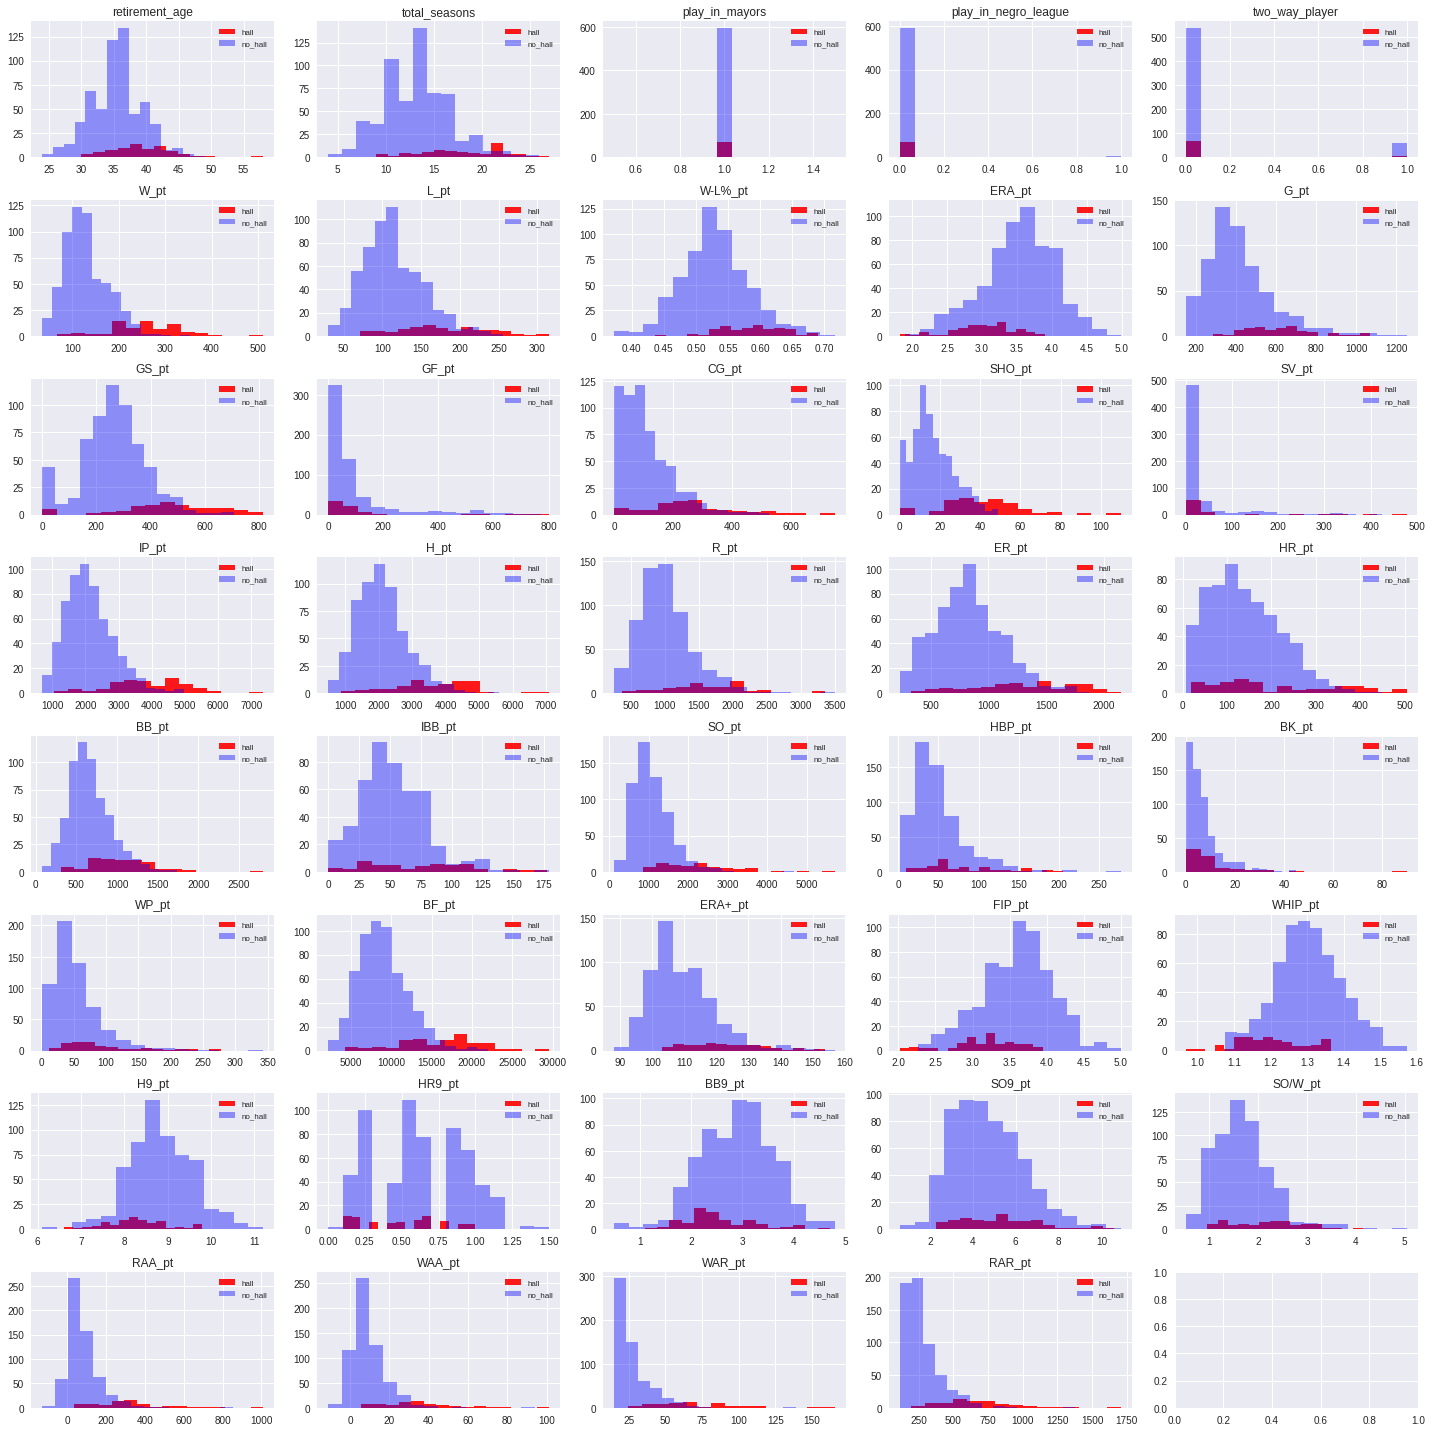

In [30]:
_, axes = plt.subplots(8,5, figsize=(20, 20))


ax = axes.ravel()
i = 0
for feat_n in features[:-1]:                  # for each of the 40 features
    bins = 15
    #---plot histogram for each feature---
    ax[i].hist(hall[feat_n], bins=bins, color='r', alpha=.9)
    ax[i].hist(no_hall[feat_n], bins=bins, color='b', alpha=0.4)
    #---set the title---
    ax[i].set_title(feat_n, fontsize=12)    
    #---display the legend---
    ax[i].legend(['hall','no_hall'], loc='best', fontsize=8)
    i +=1
    
plt.tight_layout()
plt.show()

In [31]:
#of_features = ['retirement_age','total_seasons','play_in_mayors','play_in_negro_league','two_way_player'
#            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
#            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','IBB_pt','SO_pt','HBP_pt','BK_pt','WP_pt',
#            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','H9_pt','HR9_pt','BB9_pt','SO9_pt','SO/W_pt',
#            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]

of_features = ['play_in_mayors','play_in_negro_league','two_way_player'
            ,'W_pt','L_pt','W-L%_pt','ERA_pt','G_pt','GS_pt','GF_pt','CG_pt','SHO_pt','SV_pt',
            'IP_pt','H_pt','R_pt','ER_pt','HR_pt','BB_pt','SO_pt',
            'BF_pt','ERA+_pt','FIP_pt','WHIP_pt','SO/W_pt',
            'RAA_pt','WAA_pt','WAR_pt','RAR_pt',]
#fffffffffffff

In [32]:
temp=inactive_mayors_lg_pit_df.dropna()
temp.reset_index(inplace=True, drop=True)

X = select_features(temp, of_features)
y = select_features(temp, ['HoF'])

print(y.count)

<bound method DataFrame.count of      HoF
0      0
1      0
2      0
3      0
4      0
..   ...
506    0
507    0
508    0
509    0
510    0

[511 rows x 1 columns]>


In [33]:
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)
#print(a.count)
#print(b.count)

In [34]:
print(X.index)
y.index

RangeIndex(start=0, stop=511, step=1)


RangeIndex(start=0, stop=511, step=1)

In [35]:
X.describe()

,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,W_pt,L_pt,W-L%_pt,ERA_pt,G_pt,GS_pt,GF_pt,CG_pt,SHO_pt,SV_pt,IP_pt,H_pt,R_pt,ER_pt,HR_pt,BB_pt,IBB_pt,SO_pt,HBP_pt,BK_pt,WP_pt,BF_pt,ERA+_pt,FIP_pt,WHIP_pt,H9_pt,HR9_pt,BB9_pt,SO9_pt,SO/W_pt,RAA_pt,WAA_pt,WAR_pt,RAR_pt
count,511.000000,511.000000,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,36.659491,14.442270,1.0,0.009785,0.019569,136.921722,117.839530,0.532665,3.619980,466.966732,281.430528,107.837573,87.211350,16.933464,36.534247,2225.946184,2171.749511,1011.557730,890.475538,174.939335,722.320939,54.389432,1258.724070,45.086106,8.082192,52.003914,9389.512720,110.127202,3.684423,1.305233,8.770254,0.720352,2.973973,5.157730,1.782877,93.027397,10.829159,30.618982,303.307241
std,3.819648,3.624007,0.0,0.098529,0.138651,59.915412,44.736063,0.052631,0.409077,182.285095,146.882007,151.367890,71.544709,12.886514,72.297847,898.481796,873.322367,394.082787,342.360461,84.241543,303.152280,29.653208,672.555364,28.693246,8.377204,34.186512,3745.062406,11.078926,0.390047,0.083955,0.726836,0.226172,0.641053,1.629187,0.602456,111.118940,12.378750,18.061583,176.916025
min,26.000000,7.000000,1.0,0.000000,0.000000,35.000000,30.000000,0.372000,2.520000,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,693.200000,479.000000,252.000000,234.000000,18.000000,162.000000,0.000000,257.000000,4.000000,0.000000,1.000000,2168.000000,92.000000,2.170000,1.054000,6.100000,0.200000,1.400000,1.800000,0.730000,-70.000000,-6.500000,15.000000,113.000000
25%,34.000000,12.000000,1.0,0.000000,0.000000,97.000000,87.000000,0.499000,3.340000,341.000000,202.000000,18.000000,35.000000,8.000000,3.000000,1639.100000,1566.000000,750.000000,666.000000,113.000000,510.500000,34.000000,834.000000,26.000000,3.000000,28.000000,6906.500000,102.000000,3.410000,1.251000,8.300000,0.600000,2.500000,3.900000,1.360000,27.000000,3.600000,18.900000,185.000000
50%,37.000000,14.000000,1.0,0.000000,0.000000,123.000000,112.000000,0.531000,3.620000,424.000000,276.000000,52.000000,72.000000,15.000000,11.000000,2064.200000,2033.000000,953.000000,839.000000,158.000000,674.000000,50.000000,1104.000000,39.000000,6.000000,45.000000,8690.000000,107.000000,3.690000,1.306000,8.800000,0.700000,2.900000,5.100000,1.740000,62.000000,7.300000,24.500000,241.000000
75%,39.000000,16.000000,1.0,0.000000,0.000000,166.000000,141.500000,0.564000,3.900000,559.500000,363.500000,111.500000,118.500000,24.000000,27.000000,2656.550000,2609.500000,1213.000000,1083.000000,222.500000,860.000000,72.000000,1509.500000,55.000000,10.000000,67.500000,11230.000000,116.000000,3.925000,1.358000,9.200000,0.900000,3.400000,6.150000,2.110000,122.000000,13.700000,35.000000,349.000000
max,58.000000,27.000000,1.0,1.000000,1.000000,373.000000,292.000000,0.717000,4.990000,1252.000000,773.000000,802.000000,436.000000,90.000000,478.000000,5404.000000,5044.000000,2337.000000,2012.000000,505.000000,2795.000000,179.000000,5714.000000,190.000000,90.000000,277.000000,22677.000000,157.000000,5.000000,1.539000,10.800000,1.500000,4.800000,10.900000,4.380000,853.000000,93.900000,138.700000,1377.000000


In [36]:
print(X.shape)
y.shape

(511, 39)


(511, 1)

In [37]:
y.value_counts()

HoF
0      459
1       52
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [38]:
round((52/459),3)*100

11.3

Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el entrenamiento

In [40]:
from Models.functions.learning_curve import learning_curves_describe
from Models.functions.metrics import train_with_cv, show_baseline_score

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [41]:
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8982
AUC: 0.5000


In [42]:
import sklearn

temp=X.dropna()
temp.reset_index(inplace=True,drop=True)
test=sklearn.preprocessing.normalize(temp)

El resultado AUC promediado es 0.7843
El resultado ACC promediado es 0.9416
El resultado CK promediado es 0.6027


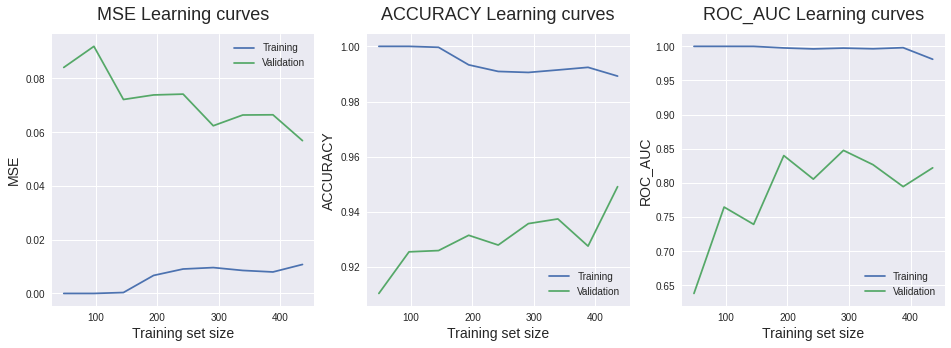

In [43]:
dtg4_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
dtg4_metric = train_with_cv(dtg4_clf, X, y, n_splits=50)
learning_curves_describe(dtg4_clf,X,y)

El resultado AUC promediado es 0.8182
El resultado ACC promediado es 0.9276
El resultado CK promediado es 0.6120


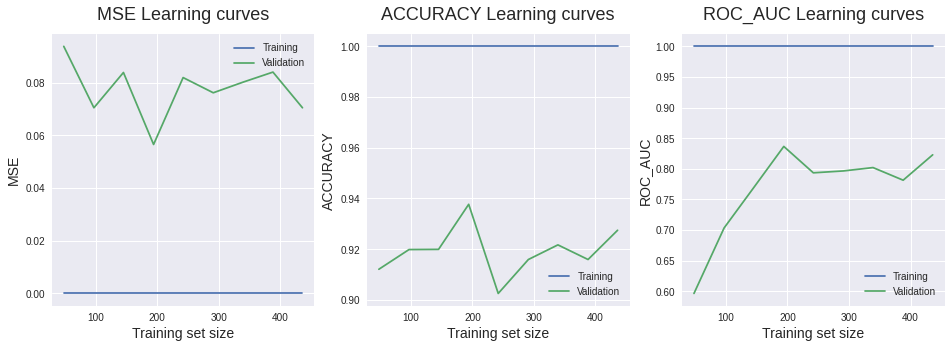

In [44]:
dtgx_clf = DecisionTreeClassifier(criterion='gini')
dtgx_metric = train_with_cv(dtgx_clf, X, y)
learning_curves_describe(dtgx_clf,X,y)

Vamos a ver que nos dicen los clasificadores acerca de los features sin agregar ningun procesamiento previo

El resultado AUC promediado es 0.8308
El resultado ACC promediado es 0.9315
El resultado CK promediado es 0.5895


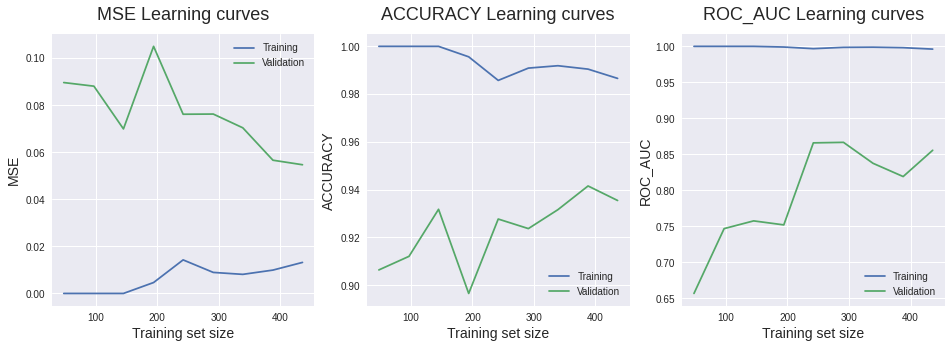

In [45]:
dte4_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dte4_metric = train_with_cv(dte4_clf, X, y)
learning_curves_describe(dte4_clf,X,y)

El resultado AUC promediado es 0.8202
El resultado ACC promediado es 0.9296
El resultado CK promediado es 0.5678


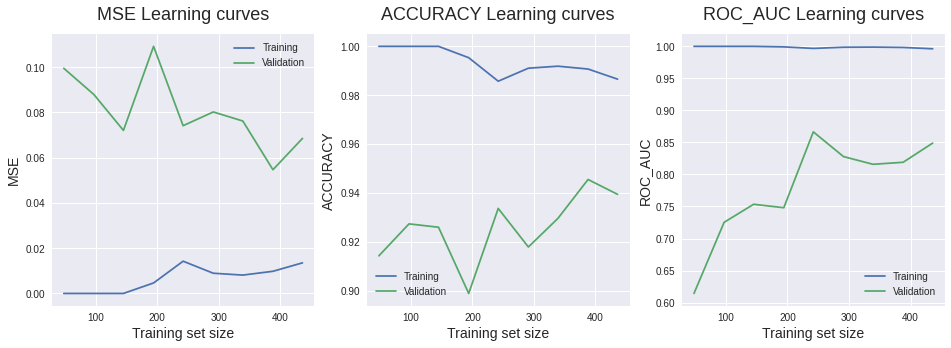

In [46]:
dte3_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dte3_metric = train_with_cv(dte3_clf, X, y)
learning_curves_describe(dte3_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

El resultado AUC promediado es 0.9066
El resultado ACC promediado es 0.9257
El resultado CK promediado es 0.3937


KeyboardInterrupt: 

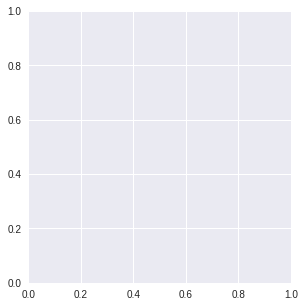

In [47]:
svmp_clf = SVC(probability=True, kernel='poly')
svmp_metric = train_with_cv(svmp_clf, X, y)
learning_curves_describe(svmp_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

El resultado AUC promediado es 0.9137
El resultado ACC promediado es 0.9297
El resultado CK promediado es 0.4611


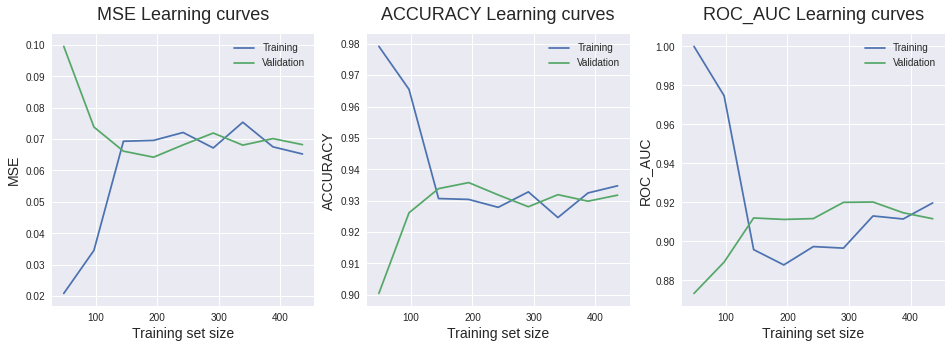

In [ ]:
svmr_clf = SVC(probability=True, kernel='rbf')
svmr_metric = train_with_cv(svmr_clf, X, y)
learning_curves_describe(svmr_clf,X,y)

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

El resultado AUC promediado es 0.9746
El resultado ACC promediado es 0.9512
El resultado CK promediado es 0.6962


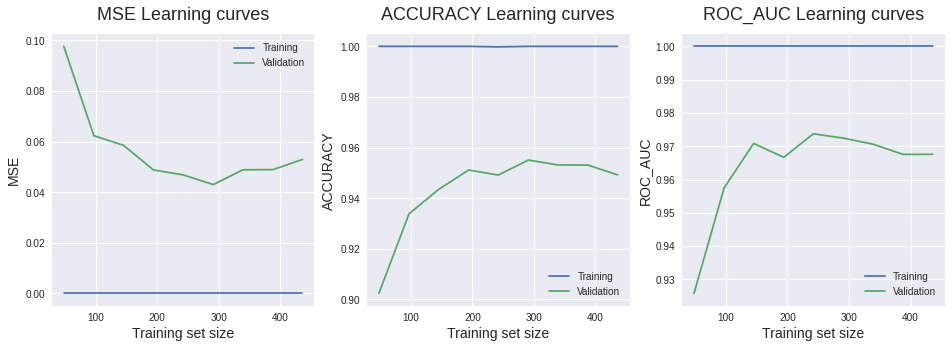

In [ ]:
rfg100_clf = RandomForestClassifier()
rfg100_metric = train_with_cv(rfg100_clf, X, y)
learning_curves_describe(rfg100_clf,X,y)

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

El resultado AUC promediado es 0.9798
El resultado ACC promediado es 0.9512
El resultado CK promediado es 0.6926


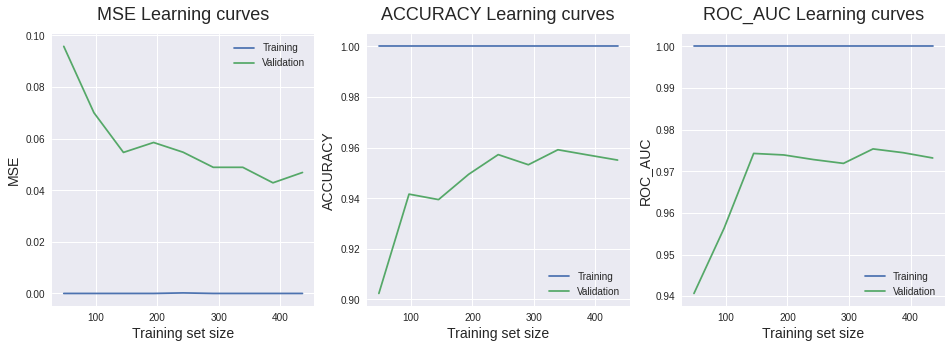

In [ ]:
rfe100_clf = RandomForestClassifier(criterion='entropy')
rfe100_metric = train_with_cv(rfe100_clf, X, y)
learning_curves_describe(rfe100_clf,X,y)

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

El resultado AUC promediado es 0.9316
El resultado ACC promediado es 0.9453
El resultado CK promediado es 0.6347


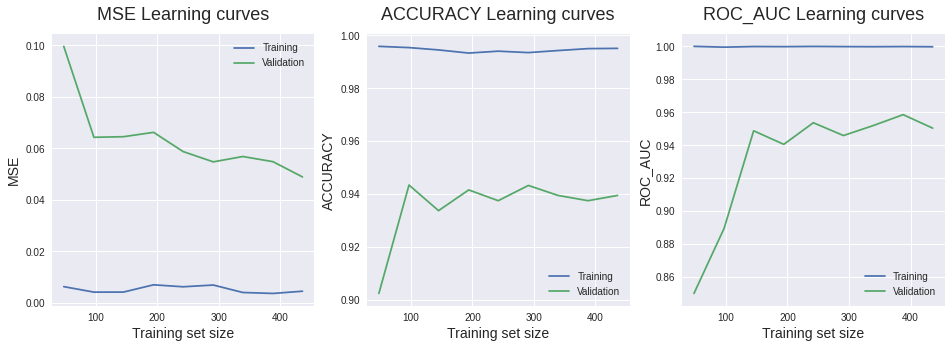

In [ ]:
rfg10_clf = RandomForestClassifier(n_estimators=10)
rfg10_metric = train_with_cv(rfg10_clf, X, y)
learning_curves_describe(rfg10_clf,X,y)

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/metrics.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

El resultado AUC promediado es 0.9303
El resultado ACC promediado es 0.9472
El resultado CK promediado es 0.6744


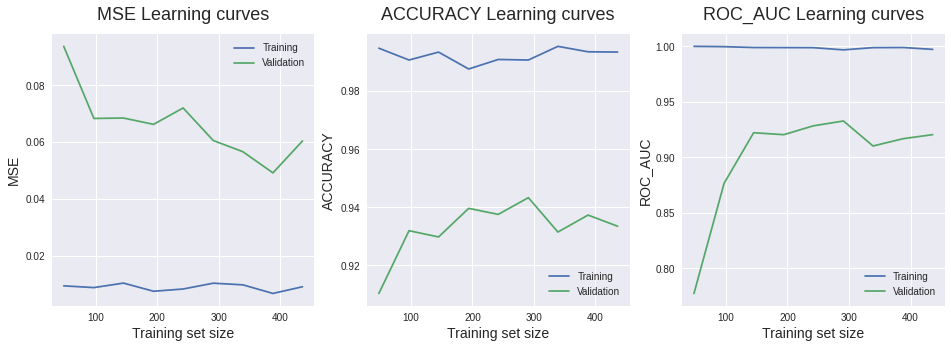

In [ ]:
rfg5_clf = RandomForestClassifier(n_estimators=5)
rfg5_metric = train_with_cv(rfg5_clf, X, y)
learning_curves_describe(rfg5_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

El resultado AUC promediado es 0.9600
El resultado ACC promediado es 0.9022
El resultado CK promediado es 0.5786


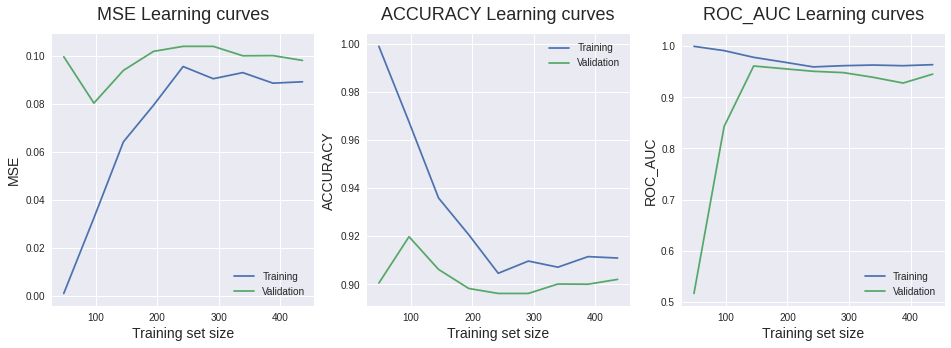

In [ ]:
nb_clf = GaussianNB()
nb_metric = train_with_cv(nb_clf, X, y)
learning_curves_describe(nb_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

El resultado AUC promediado es 0.8267
El resultado ACC promediado es 0.9355
El resultado CK promediado es 0.5582


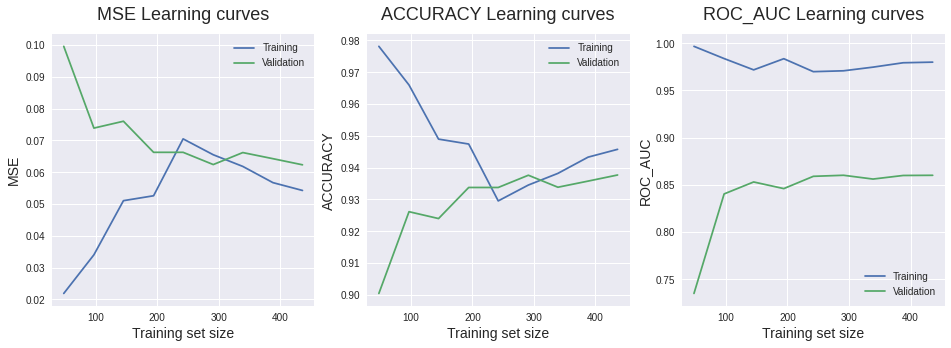

In [ ]:
knn5_clf = KNeighborsClassifier(n_neighbors=5)
knn5_metric = train_with_cv(knn5_clf, X, y)
learning_curves_describe(knn5_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

El resultado AUC promediado es 0.7865
El resultado ACC promediado es 0.9277
El resultado CK promediado es 0.5210


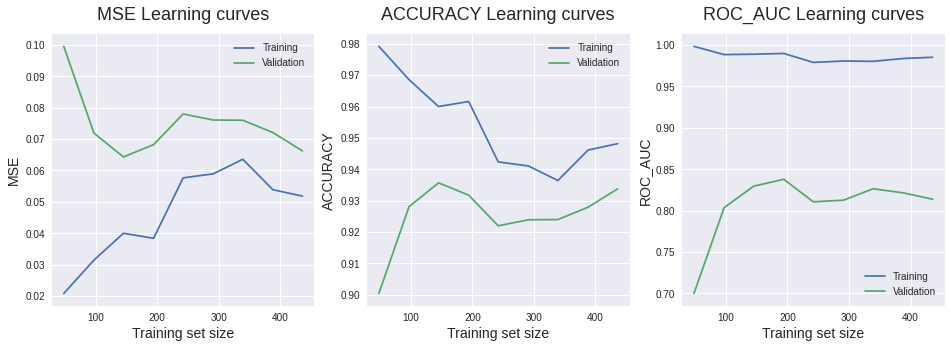

In [ ]:
knn3_clf = KNeighborsClassifier(n_neighbors=3)
knn3_metric = train_with_cv(knn3_clf, X, y)
learning_curves_describe(knn3_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

El resultado AUC promediado es 0.8491
El resultado ACC promediado es 0.9316
El resultado CK promediado es 0.4828


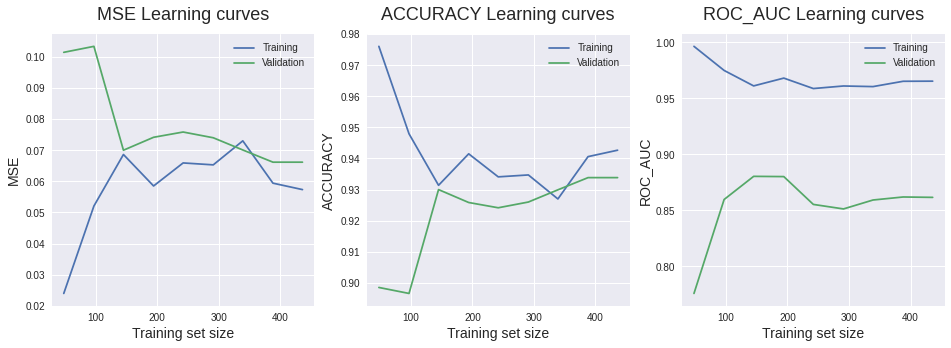

In [ ]:
knn10_clf = KNeighborsClassifier(n_neighbors=10)
knn10_metric = train_with_cv(knn10_clf, X, y)
learning_curves_describe(knn10_clf,X,y)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

El resultado AUC promediado es 0.9541
El resultado ACC promediado es 0.9491
El resultado CK promediado es 0.7017


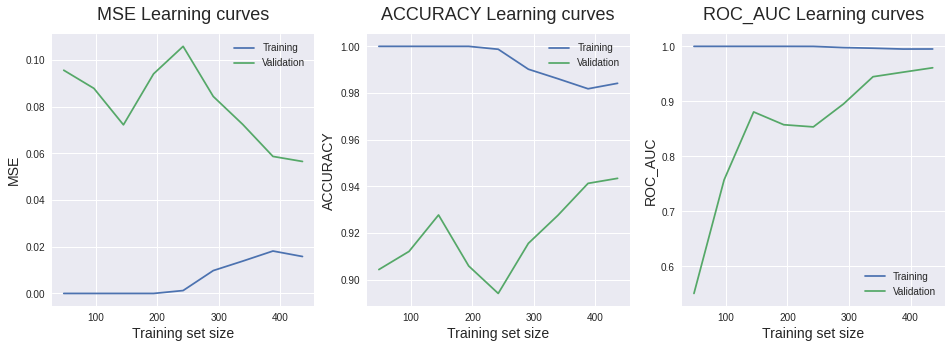

In [ ]:
lr_clf = LogisticRegression(max_iter=10000, solver="liblinear")
lr_metric = train_with_cv(lr_clf, X, y)
learning_curves_describe(lr_clf,X,y)

In [ ]:
label = ['dtg4','dte4', 'dte3','svm_r','svm_p', 'knn5', 'knn3', 'lr']
auc_s = [dtg4_metric[1], dte4_metric[1], dte3_metric[1], svmr_metric[1], svmp_metric[1], knn5_metric[1], knn3_metric[1], lr_metric[1]]
acc_s = [dtg4_metric[0], dte4_metric[0], dte3_metric[0], svmr_metric[0], svmp_metric[0], knn5_metric[0], knn3_metric[0], lr_metric[0]]

In [ ]:
#plt.scatter(auc_s, acc_s,)

Vamos a ver que nos dicen los modelos acerca de los features

In [ ]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

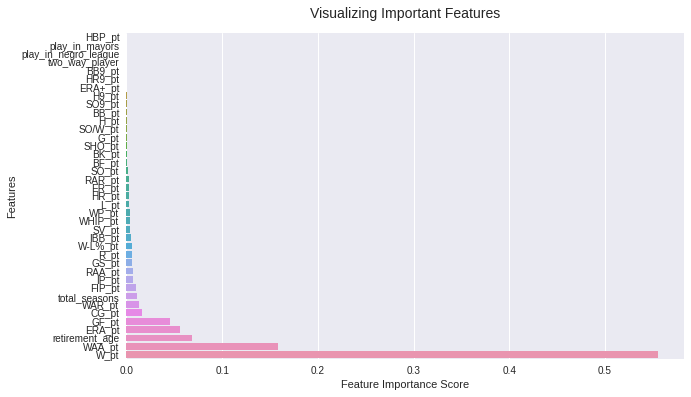

In [ ]:
dt4_clf = DecisionTreeClassifier(max_depth=4)
plot_feature_importance(clasifier_ft_importance_experiments(dt4_clf,X,y,0.7,50).sort_values())

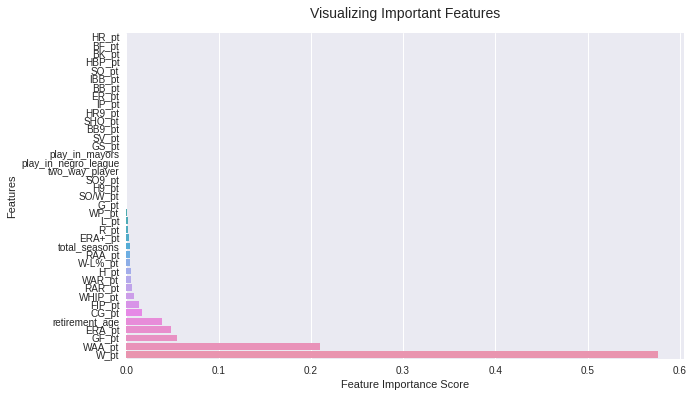

In [ ]:
dt3_clf = DecisionTreeClassifier(max_depth=3)
plot_feature_importance(clasifier_ft_importance_experiments(dt3_clf,X,y,0.7,30).sort_values())

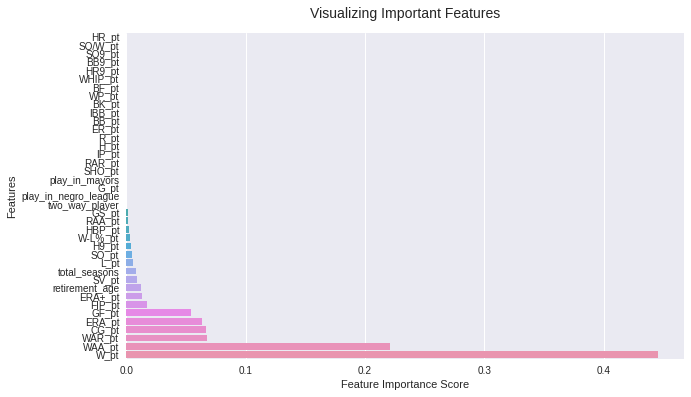

In [ ]:
dt3e_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
plot_feature_importance(clasifier_ft_importance_experiments(dt3e_clf,X,y,0.7,20).sort_values())

Las estadísticas avanzadas parecieran ser las que llevan el mayor peso 

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y 

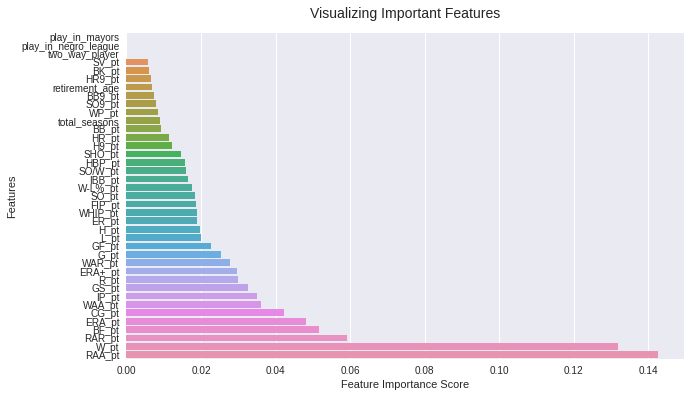

In [ ]:
rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf10_clf,X,y,0.7,20).sort_values())

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y 

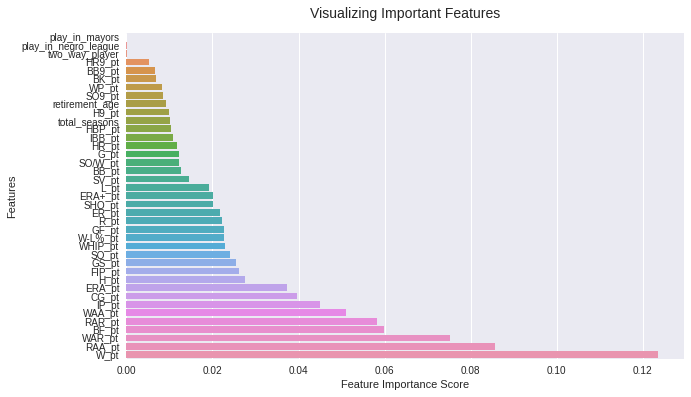

In [ ]:
rf50_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y,0.7,20).sort_values())

/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/home/Belzico/Documents/GitHub/DJ-MLB-Hall-Fame/Modelsb/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y 

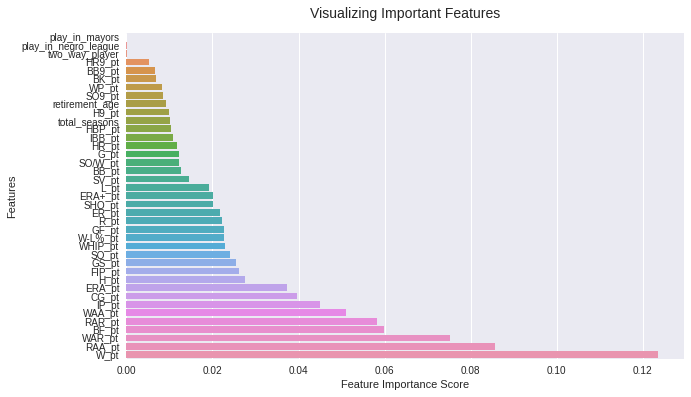

In [ ]:
rf100_clf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y,0.7,20).sort_values())

#ffffffffffff

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/Belzico/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

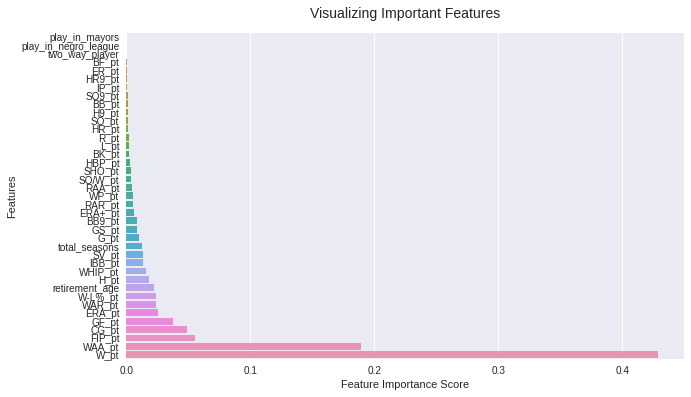

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=200)
plot_feature_importance(clasifier_ft_importance_experiments(gb_clf,X,y,0.7,20).sort_values())

Vamos a probar con los algoritmos de seleccion de features y distintos algoritmos de clasificacion

In [ ]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [ ]:
feature_selection_RFE(DecisionTreeClassifier(),X, np.ravel(y), 10)

Feature: retirement_age, Rank: 1
Feature: total_seasons, Rank: 1
Feature: W_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: GF_pt, Rank: 1
Feature: CG_pt, Rank: 1
Feature: H_pt, Rank: 1
Feature: SO_pt, Rank: 1
Feature: RAA_pt, Rank: 1
Feature: WAA_pt, Rank: 1


In [ ]:
feature_selection_RFE(RandomForestClassifier(),X, np.ravel(y), 10)

Feature: W_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: CG_pt, Rank: 1
Feature: IP_pt, Rank: 1
Feature: BF_pt, Rank: 1
Feature: FIP_pt, Rank: 1
Feature: RAA_pt, Rank: 1
Feature: WAA_pt, Rank: 1
Feature: WAR_pt, Rank: 1
Feature: RAR_pt, Rank: 1


El metodo de RFECV, selecciona automaticamente la cantidad de features

In [ ]:
rfecv = RFECV(estimator=DecisionTreeClassifier())
rfecv.fit(X, np.ravel(y))
f = 0
for i in range(X.shape[1]):
    if rfecv.support_[i]:
        f+=1
        print(f'Feature: {X.columns[i]}, Rank: {rfecv.ranking_[i]}')
f

Feature: retirement_age, Rank: 1
Feature: W_pt, Rank: 1
Feature: ERA_pt, Rank: 1
Feature: WAA_pt, Rank: 1


4

In [ ]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

In [ ]:
estimators = [DecisionTreeClassifier()]
automatic_feature_selection(estimators, X, y, 10)

Total selections:10


[('W_pt', 100.0, 1.0),
 ('WAA_pt', 100.0, 1.0),
 ('retirement_age', 90.0, 1.0),
 ('ERA_pt', 90.0, 1.0),
 ('H_pt', 60.0, 1.0),
 ('GF_pt', 40.0, 1.0),
 ('total_seasons', 30.0, 1.0),
 ('BF_pt', 10.0, 1.0)]

In [ ]:
estimators = [DecisionTreeClassifier(), GradientBoostingClassifier()]
automatic_feature_selection(estimators, X, y, 10)

In [ ]:
from numpy import std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def get_models_pipelines(n_features=10):
	models = dict()

	rfe = RFE(estimator=LogisticRegression(max_iter=10000, solver="liblinear"), n_features_to_select=n_features)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])

	rfe = RFE(estimator=Perceptron(), n_features_to_select=n_features)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])

	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
	model = DecisionTreeClassifier()
	models['dtr'] = Pipeline(steps=[('s',rfe),('m',model)])

	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])

	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=n_features)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

def evaluate_model(model, X, y, eval='accuracy'):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring=eval, cv=cv, n_jobs=-1)
	return scores

>lr 0.907 (0.037)
>per 0.932 (0.044)
>dtr 0.932 (0.033)
>rf 0.937 (0.036)
>gbm 0.928 (0.036)


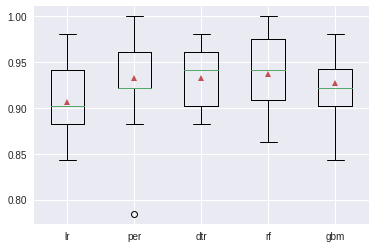

In [ ]:
from matplotlib import pyplot

models = get_models_pipelines()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, np.ravel(y))
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Veamos la correlacion de las variables respecto al Target

In [ ]:
df = select_features(inactive_mayors_lg_pit_df, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF                     1.000000
WAR_pt                  0.662750
RAR_pt                  0.629285
W_pt                    0.615663
WAA_pt                  0.611964
RAA_pt                  0.593377
IP_pt                   0.565046
SO_pt                   0.542933
BF_pt                   0.542822
SHO_pt                  0.542597
H_pt                    0.489571
GS_pt                   0.454840
L_pt                    0.441576
CG_pt                   0.432513
ER_pt                   0.415041
BB_pt                   0.406398
R_pt                    0.405078
ERA+_pt                 0.399800
total_seasons           0.374312
G_pt                    0.347942
WHIP_pt                 0.333274
W-L%_pt                 0.326803
ERA_pt                  0.305015
retirement_age          0.293593
FIP_pt                  0.286474
WP_pt                   0.275923
HBP_pt                  0.266587
SO/W_pt                 0.247043
HR_pt                   0.244493
H9_pt                   0.240430
IBB_pt    

Pongamos 50% como limite

In [ ]:
feat_more_corr = df_corr[df_corr > 0.5].index.to_list()[1:]
feat_more_corr

['WAR_pt',
 'RAR_pt',
 'W_pt',
 'WAA_pt',
 'RAA_pt',
 'IP_pt',
 'SO_pt',
 'BF_pt',
 'SHO_pt']

Vamos a observar como se comportan en un primer momento algunos algoritmos de clasificacion

In [ ]:
def experiments(clf, X, y,iterations: int):
    rs = []
    for _ in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)
        clf.fit(X_train, y_train)
        rs.append(clf.score(X_test, y_test))
    return rs

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()


In [ ]:
np.mean(experiments(nb_clf, X,  np.ravel(y) , 50))

0.908961038961039

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.ensemble import RandomForestClassifier

In [ ]:
kn_clf = KNeighborsClassifier(n_neighbors=5)
np.mean(experiments(kn_clf, X, np.ravel(y), 100))

0.9302597402597401

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
lr_model = LogisticRegression(max_iter=10000, solver="liblinear")
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

/home/Belzico/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9545454545454546

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.961038961038961

[Text(0.640625, 0.9, 'WAA_pt <= 26.4\ngini = 0.181\nsamples = 357\nvalue = [321, 36]\nclass = NoHoF'),
 Text(0.40625, 0.7, 'W_pt <= 256.5\ngini = 0.071\nsamples = 325\nvalue = [313, 12]\nclass = NoHoF'),
 Text(0.25, 0.5, 'GF_pt <= 660.5\ngini = 0.049\nsamples = 320\nvalue = [312, 8]\nclass = NoHoF'),
 Text(0.125, 0.3, 'CG_pt <= 172.5\ngini = 0.037\nsamples = 317\nvalue = [311, 6]\nclass = NoHoF'),
 Text(0.0625, 0.1, 'gini = 0.007\nsamples = 292\nvalue = [291, 1]\nclass = NoHoF'),
 Text(0.1875, 0.1, 'gini = 0.32\nsamples = 25\nvalue = [20, 5]\nclass = NoHoF'),
 Text(0.375, 0.3, 'FIP_pt <= 3.335\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = HoF'),
 Text(0.3125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = HoF'),
 Text(0.4375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NoHoF'),
 Text(0.5625, 0.5, 'CG_pt <= 171.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = HoF'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NoHoF'),
 Text(0.625, 0.3, 

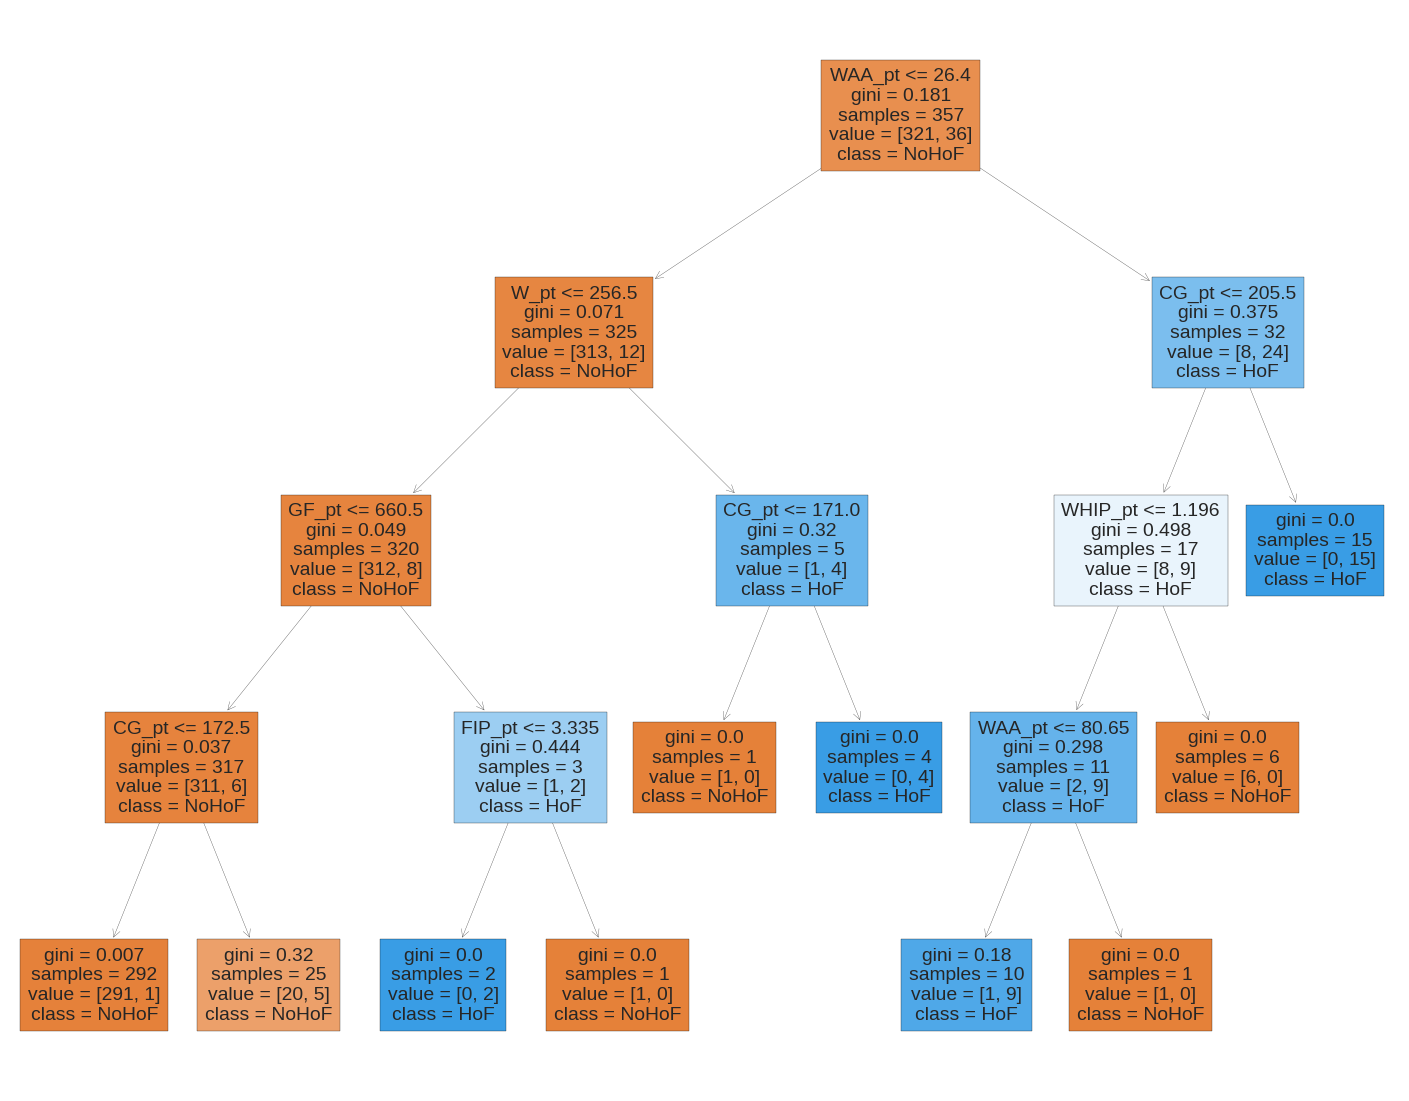

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt_clf, feature_names=X.columns, class_names=['NoHoF','HoF'], filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

/tmp/ipykernel_4268/2339362602.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.961038961038961

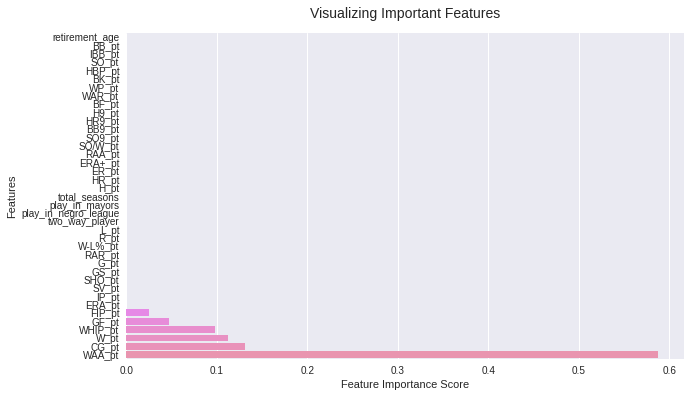

In [ ]:
feat_imp = pd.Series(dt_clf.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values()
plot_feature_importance(feat_imp)

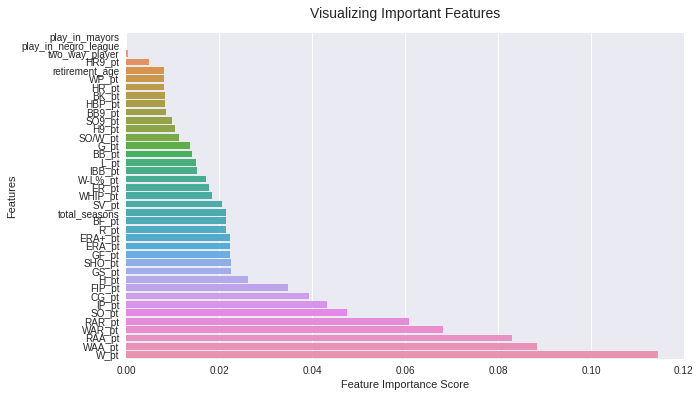

In [ ]:
feat_imp = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values()
plot_feature_importance(feat_imp)

In [ ]:
X_t = X.to_numpy()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2,
                n_init=8,
                tol=1e-4, 
                random_state=170).fit(X_t)

In [ ]:
import numpy as np
groups = np.zeros((2,2))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labels = kmeans.labels_
hall_ = y.to_numpy()

In [ ]:
print(len(labels))
print(len(hall_))

511
511


In [ ]:
for i in range(len(labels)):
    groups[labels[i], hall_[i]] +=1

In [ ]:
groups

array([[370.,   9.],
       [ 89.,  43.]])